In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

GDRIVE_PATH = 'gdrive/MyDrive/S1TT-08-A'

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras import Model, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [ ]:
labels = ['DEA AMELIA PUTRI', 'ADAM HUDA', 'AKBAR USAMAH']
img_size = 224

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] # Convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data(GDRIVE_PATH + '/Train')
test = get_data(GDRIVE_PATH + '/Test')

FileNotFoundError: ignored

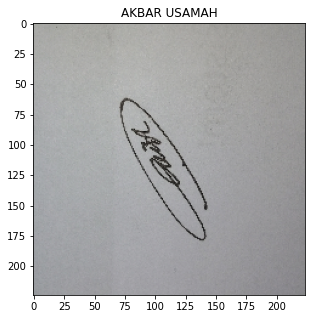

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.imshow(train[163][0])
plt.title(labels[train[163][1]])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


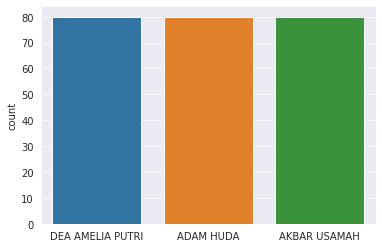

In [ ]:
import seaborn as sns

cls_plot = []
for i in train:
    if(i[1] == 0):
        cls_plot.append('DEA AMELIA PUTRI')
    elif (i[1] == 1):
        cls_plot.append('ADAM HUDA')
    else:
        cls_plot.append('AKBAR USAMAH')

sns.set_style('darkgrid')
sns.countplot(cls_plot)

In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels = []

for feature, label in train:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in test:
  test_images.append(feature)
  test_labels.append(label)

train_images = np.array(train_images) / 255
test_images = np.array(test_images) / 255

train_labels = np.array(train_labels)

test_labels = np.array(test_labels)

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, 3)
test_labels = keras.utils.to_categorical(test_labels, 3)

In [ ]:
model = keras.Sequential()
weight_decay = 0.0005
model_input = (224, 224, 3)

model.add(Conv2D(64, (3, 3), padding='same', input_shape=model_input, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     7

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save the checkpoint in the /output folder
file_path = GDRIVE_PATH + "checkpoints/models1tt08A.h5"

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, periode=5, mode='auto')

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=16, callbacks=[checkpoint])

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 1.8824 - accuracy: 0.9083 
Epoch 1: saving model to gdrive/MyDrive/Dataset Tanda Tangan/S1TT-08-Bcheckpoints/models1tt08B.h5
15/15 [==============================] - 275s 18s/step - loss: 1.8824 - accuracy: 0.9083 - val_loss: 3.0417 - val_accuracy: 0.3833
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.1003 - accuracy: 0.9875 
Epoch 2: saving model to gdrive/MyDrive/Dataset Tanda Tangan/S1TT-08-Bcheckpoints/models1tt08B.h5
15/15 [==============================] - 279s 19s/step - loss: 2.1003 - accuracy: 0.9875 - val_loss: 6.6587 - val_accuracy: 0.1500
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 2.1471 - accuracy: 1.0000 
Epoch 3: saving model to gdrive/MyDrive/Dataset Tanda Tangan/S1TT-08-Bcheckpoints/models1tt08B.h5
15/15 [==============================] - 260s 17s/step - loss: 2.1471 - accuracy: 1.0000 - val_loss: 6.6193 - val_accuracy: 0.5500
Epoch 4/20
15/15 [==========

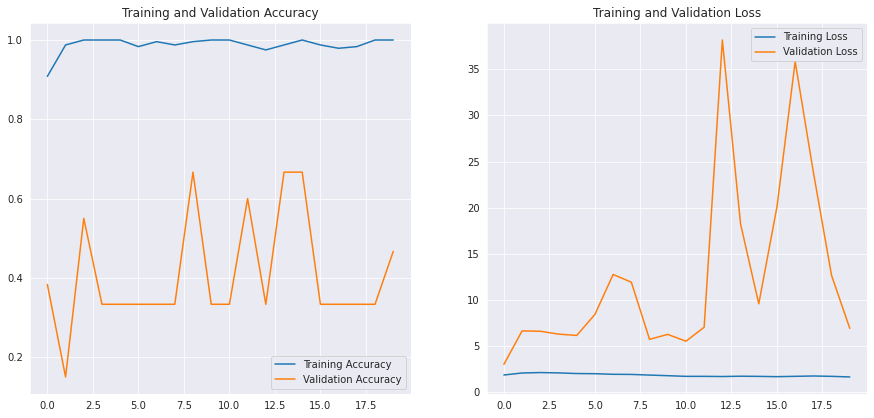

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

sip = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(sip, acc, label='Training Accuracy')
plt.plot(sip, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(sip, loss, label='Training Loss')
plt.plot(sip, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()